## Query Graph Generation
### Importing Libraries

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords

### Preprocessing

In [11]:
def preprocess_query(query, sentence_spliter='.', word_spliter=' ', punct_mark=',', download=False):
    if download == True:
        nltk.download('stopwords')
        nltk.download('averaged_perceptron_tagger')
    # lowercase all words and remove trailing whitespaces
    query = query.lower().strip()

    # remove unwanted punctuation marks
    for pm in punct_mark:
        query = query.replace(pm, '')

    # get list of sentences which are non-empty
    sentences = [sent for sent in query.split(sentence_spliter) if sent != '']

    # get list of sentences which are lists of words
    query = []
    for sent in sentences:
        words = sent.strip().split(word_spliter)
        # remove stopwords and select only nouns
        words = [word for word, pos in nltk.pos_tag(words) if (pos.startswith('NN') and word not in stopwords.words('english'))]
        query.append(words)

    return query


### Graph Nodes

In [12]:
def graph_nodes(query):
    # in our case, entities are all unique words
    unique_words = []
    for sent in query:
        for word in sent:
            if word not in unique_words:
                unique_words.append(word)
    return unique_words

### Graph Edges

In [13]:
def graph_edges(query):
    # in our case, relations are bigrams in sentences
    bigrams = []
    for sent in query:
        for i in range(len(sent)-1):
            # for every word and the next in the sentence
            pair = [sent[i], sent[i+1]]
            # only add unique bigrams
            if pair not in bigrams:
                bigrams.append(pair)
    return bigrams

### Building Graph

In [14]:
def build_graph(doc):
    # preprocess query for standardization
    pdoc = preprocess_query(doc)
    
    # get graph nodes
    nodes = graph_nodes(pdoc)
    
    # get graph edges
    edges = graph_edges(pdoc)
    
    # create graph structure with NetworkX
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G

### Plotting Graph

In [39]:
def plot_graphs(queries):
    fig, axes = plt.subplots(nrows=1, ncols=len(queries), figsize=(12, 4))
    for i, query in enumerate(queries):
        G = build_graph(query)
        pos = nx.nx_agraph.graphviz_layout(G)
        nx.draw_networkx(G, pos=pos, with_labels=True, ax=axes[i])
        plot_title = f"Query {i+1}"
        axes[i].set_title(plot_title)
    plt.tight_layout()
    plt.show()

### Sample Queries

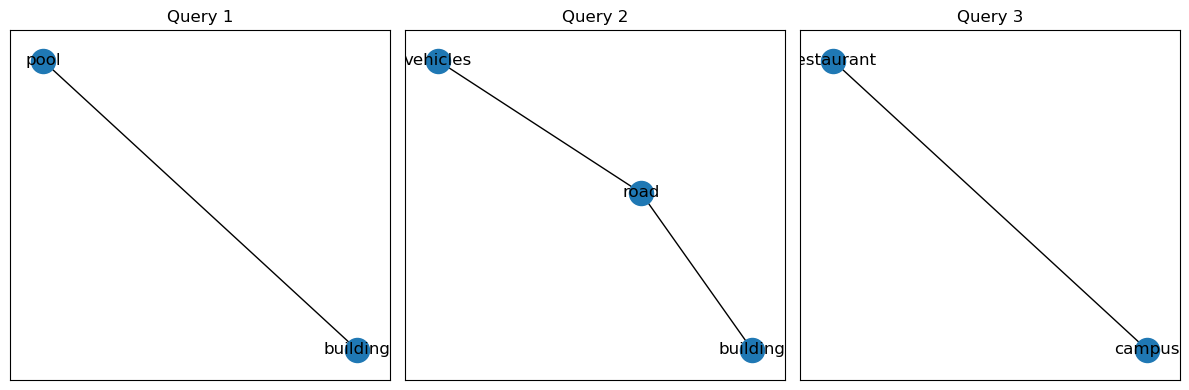

In [47]:
q1 = "Pool near to this building"
q2 = "All the vehicles that are parked on the road but also near to this building"
q3 = "where is the nearest restaurant from my campus"
queries = [q1, q2, q3]
plot_graphs(queries)